<a href="https://colab.research.google.com/github/subham-28/Trail-Projects/blob/main/Customer_Churn_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/content/Churn_Modelling.csv")

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [13]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [14]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [15]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

## One Hot Encoding

In [21]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [33]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [35]:
X_train.shape

(8000, 11)

## Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## TensorFlow & Keras

In [38]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [39]:
model=Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [42]:
model.fit(X_train_scaled,y_train,epochs=10,verbose=1)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5229
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4958
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4822
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4576
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4570
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4485
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4438
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4347
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4376
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4316


In [47]:
model.layers[0].get_weights()

[array([[-0.3335714 ,  0.2027413 ,  0.10213693],
        [-1.244831  , -1.1490238 , -1.0431261 ],
        [ 0.08744522,  0.03221487,  0.12235619],
        [ 0.00367917,  0.1099977 , -0.7664949 ],
        [-0.10172989,  0.23452464,  0.01764589],
        [ 0.23893026,  0.29441333, -0.3181865 ],
        [ 0.48510534,  0.7981757 ,  0.74492174],
        [ 0.50946796, -0.12135781, -0.24246696],
        [-0.7207473 , -0.63196033, -0.4264671 ],
        [-0.45857126,  0.17316401, -0.10967645],
        [ 0.22466174,  0.09002652,  0.92126083]], dtype=float32),
 array([0.08995362, 0.22649486, 0.1346549 ], dtype=float32)]

In [50]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [52]:
y_pred = np.where(y_log > 0.5 , 1 , 0)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.795

## Testing for different desgin of Perceptrons

In [64]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [65]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [67]:
history = model.fit(X_train_scaled,y_train,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7893 - loss: 0.5309 - val_accuracy: 0.7975 - val_loss: 0.4687
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8018 - loss: 0.4515 - val_accuracy: 0.7987 - val_loss: 0.4407
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7925 - loss: 0.4541 - val_accuracy: 0.8025 - val_loss: 0.4272
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8012 - loss: 0.4403 - val_accuracy: 0.8119 - val_loss: 0.4163
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8165 - loss: 0.4173 - val_accuracy: 0.8181 - val_loss: 0.4038
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8193 - loss: 0.4024 - val_accuracy: 0.8269 - val_loss: 0.3936
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8176 - loss: 0.4014 - val_accuracy: 0.8294 - val_loss: 0.3850
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8356 - loss: 0.3772 - val_accu

In [68]:
model.layers[0].get_weights()

[array([[-0.25033814, -0.15195905,  0.54659355, -0.39416048, -0.09967208,
          0.09635361,  0.05634473,  0.01161709,  0.02223597, -0.1106635 ,
         -0.09243051],
        [ 0.96018505, -0.04944797,  0.36453593,  0.59980536, -0.7150382 ,
          1.0419906 , -0.12234801, -0.7469959 ,  0.07346644,  0.30888185,
          0.10625095],
        [ 0.14975072,  0.13566361, -0.09357369,  0.36401176, -0.0561732 ,
          0.08526706,  0.0299236 , -0.27923274, -0.0311633 ,  0.02369432,
         -0.02202711],
        [ 0.00966848, -0.6768437 ,  0.04002495, -0.40205422,  0.1523161 ,
         -0.28657833, -0.06192382,  0.2415621 ,  0.2229851 , -0.35414752,
         -0.19387262],
        [ 0.98758906,  0.50673854, -0.1282227 , -0.2302249 ,  0.09922974,
         -0.2946018 ,  0.66075873,  0.25045106,  1.2473617 , -0.21110444,
         -0.89027405],
        [ 0.14661935, -0.17295367, -0.08670731, -0.06053233, -0.11346439,
         -0.16740723, -0.03384918,  0.562649  , -0.11525963, -0.1622361

In [69]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [70]:
y_pred = np.where(y_log > 0.5 , 1 , 0)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8635

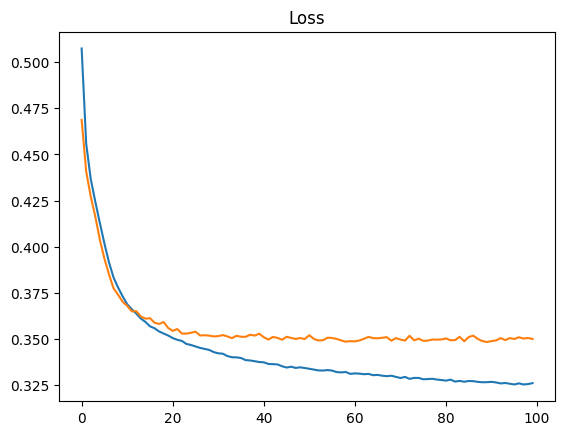

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.show()

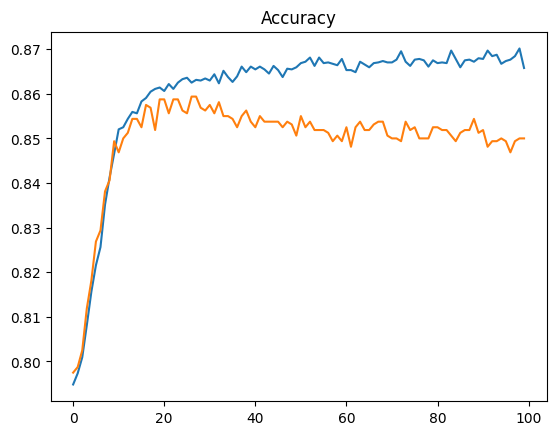

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.show()